<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/ASSIGNMENT_1/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRID SEARCH EXPERIMENT:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


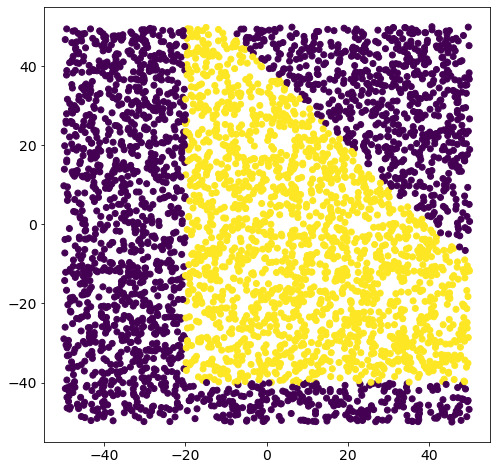

In [ ]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


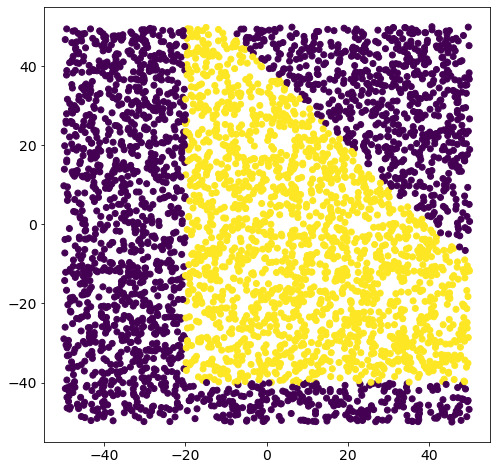

In [ ]:
import numpy as np
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [ ]:
np.random.seed(12345)

def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      initial = tf.keras.initializers.random_normal(mean=0. , stddev=1. , seed =12345)
      model.add(Dense(L, input_shape=(L,), activation='relu', kernel_initializer= initial))
      model.add(Dense(20, activation='relu', kernel_initializer= initial))
      model.add(Dense(20, activation='relu', kernel_initializer= initial))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  return model





In [ ]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = compile_model()

model.summary()


Model: "sequential_1883"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7532 (Dense)          (None, 2)                 6         
                                                                 
 dense_7533 (Dense)          (None, 20)                60        
                                                                 
 dense_7534 (Dense)          (None, 20)                420       
                                                                 
 dropout_1883 (Dropout)      (None, 20)                0         
                                                                 
 dense_7535 (Dense)          (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_initial = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

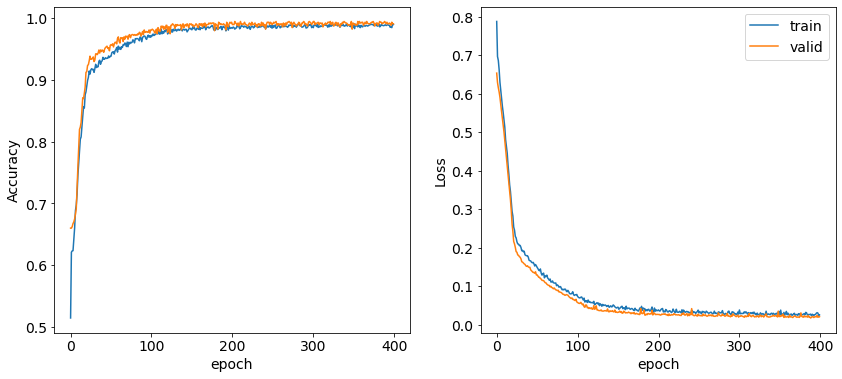

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend()

# GRID SEARCH :

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

#other parameters
activations = [ 'sigmoid','relu','elu']
dropout_rates = [ 0.2, 0.4, 0.6]
n_layers=[4,6,8]
neurons = [20, 25, 30]
#batch_size = [50,70,90]
#epochs = [200, 400, 500]


# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta','Adamax', 'Nadam']
# define parameter dictionary
#param_grid = dict( epochs=epochs, batch_size=batch_size)
param_grid = dict(optimizer=optimizer)#dict(optimizer=optimizer,activation=activations, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


100/100 [==============================] - 1s 4ms/step - loss: 0.8964 - accuracy: 0.5634 - val_loss: 0.6058 - val_accuracy: 0.6913
Best: 0.678125 using {'optimizer': 'RMSprop'}
0.595313 (0.057428) with: {'optimizer': 'SGD'}
0.678125 (0.035295) with: {'optimizer': 'RMSprop'}
0.599687 (0.082046) with: {'optimizer': 'Adam'}
0.537812 (0.116717) with: {'optimizer': 'Adagrad'}
0.463125 (0.101452) with: {'optimizer': 'Adadelta'}
0.583437 (0.063856) with: {'optimizer': 'Adamax'}
0.563437 (0.093660) with: {'optimizer': 'Nadam'}


In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 4ms/step - loss: 0.5597 - accuracy: 0.6603 - val_loss: 0.5432 - val_accuracy: 0.6150
Best: 0.696875 using {'activation': 'sigmoid', 'optimizer': 'Adam'}
0.639062 (0.082790) with: {'activation': 'sigmoid', 'optimizer': 'SGD'}
0.581250 (0.043526) with: {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.696875 (0.030059) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}
0.530313 (0.097433) with: {'activation': 'sigmoid', 'optimizer': 'Adagrad'}
0.483750 (0.065960) with: {'activation': 'sigmoid', 'optimizer': 'Adadelta'}
0.502187 (0.056544) with: {'activation': 'sigmoid', 'optimizer': 'Adamax'}
0.583438 (0.044777) with: {'activation': 'sigmoid', 'optimizer': 'Nadam'}
0.640313 (0.046160) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.592812 (0.024975) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.530938 (0.138226) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.487500 (0.079976) with: {'activation': 'relu', 'optimizer': 'Ada

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations,dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 4ms/step - loss: 1.0430 - accuracy: 0.6162 - val_loss: 0.5638 - val_accuracy: 0.6837
Best: 0.705313 using {'activation': 'sigmoid', 'dropout_rate': 0.6, 'optimizer': 'RMSprop'}
0.636250 (0.036411) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'SGD'}
0.666875 (0.042376) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}
0.615312 (0.060223) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adam'}
0.575313 (0.072594) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adagrad'}
0.611250 (0.081072) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adadelta'}
0.554687 (0.076869) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adamax'}
0.620937 (0.073327) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Nadam'}
0.597188 (0.022524) with: {'activation': 'sigmoid', 'dropout_rate': 0.4, 'optimizer': 'SGD'}
0.668750 (0.03

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, neurons=neurons)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.6406 - val_loss: 0.6471 - val_accuracy: 0.7063
Best: 0.706875 using {'activation': 'relu', 'dropout_rate': 0.6, 'neurons': 25, 'optimizer': 'SGD'}
0.667188 (0.036049) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'SGD'}
0.657187 (0.091157) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'RMSprop'}
0.655312 (0.088681) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adam'}
0.535000 (0.131342) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adagrad'}
0.484062 (0.122112) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adadelta'}
0.475313 (0.075012) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adamax'}
0.568125 (0.053140) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Na

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, n_layers=n_layers,)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



100/100 [==============================] - 1s 4ms/step - loss: 1.1518 - accuracy: 0.4412 - val_loss: 0.6119 - val_accuracy: 0.5813
Best: 0.709688 using {'activation': 'relu', 'dropout_rate': 0.4, 'n_layers': 4, 'optimizer': 'RMSprop'}
0.568750 (0.096148) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'SGD'}
0.617813 (0.052302) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'RMSprop'}
0.579688 (0.117255) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adam'}
0.495938 (0.129598) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adagrad'}
0.578125 (0.108002) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adadelta'}
0.525625 (0.071466) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adamax'}
0.591250 (0.052007) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer':

In [ ]:
results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('Grid_Search_Results.csv')
df_GridSearch = pd.read_csv('Grid_Search_Results.csv')
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score")
df_GridSearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_n_layers,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.887951,0.122372,0.256583,0.040304,sigmoid,0.2,4,SGD,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.63000,0.49625,0.69250,0.45625,0.568750,0.096148,123
1,1.277887,0.245782,0.214877,0.009282,sigmoid,0.2,4,RMSprop,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.58875,0.69125,0.63875,0.55250,0.617813,0.052302,72
2,1.100793,0.127847,0.216234,0.005733,sigmoid,0.2,4,Adam,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.55000,0.40625,0.72250,0.64000,0.579688,0.117255,113
3,1.120947,0.005859,0.222806,0.006745,sigmoid,0.2,4,Adagrad,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.47625,0.55750,0.65125,0.29875,0.495938,0.129598,171
4,1.001796,0.257208,0.213773,0.004488,sigmoid,0.2,4,Adadelta,"{'activation': 'sigmoid', 'dropout_rate': 0.2,...",0.65625,0.41500,0.54875,0.69250,0.578125,0.108002,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1.280921,0.320154,0.248674,0.033582,elu,0.6,8,Adam,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.64125,0.66250,0.60500,0.64625,0.638750,0.021010,47
185,1.004159,0.125639,0.262745,0.033852,elu,0.6,8,Adagrad,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.64125,0.39625,0.54875,0.50375,0.522500,0.088149,158
186,1.134396,0.012269,0.271404,0.034817,elu,0.6,8,Adadelta,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.52625,0.44875,0.52375,0.48000,0.494687,0.032275,172
187,1.204750,0.365691,0.249003,0.022766,elu,0.6,8,Adamax,"{'activation': 'elu', 'dropout_rate': 0.6, 'n_...",0.59875,0.53500,0.61500,0.45750,0.551563,0.061994,137


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9db06e8-b879-40eb-b8fc-8366232e2a44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>